# Problem Statement

The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet. This paper presents a novel
Business-to-Business collaboration platform from the agri-food sector perspective,
which aims to facilitate the collaboration of numerous stakeholders belonging to
associated business domains, in an effective and flexible manner.
This dataset provides a huge amount of information on crop production in India
ranging from several years. Based on the Information the ultimate goal would be to
**predict crop production** and find important insights highlighting key indicators and
metrics that influence crop production.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('Crop Production data.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.shape

(246091, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
# Missing values check

df.isnull().sum()/len(df)*100

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

In [7]:
# duplicates check

df.duplicated().sum()

0

In [8]:
# dropping null records w.r.t to target column

df.dropna(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,242361.0,2005.625773,4.958285e+00,1997.0,2002.0,2006.0,2010.0,2.015000e+03
Area,242361.0,12167.414482,5.085744e+04,0.1,87.0,603.0,4545.0,8.580100e+06
Production,242361.0,582503.442251,1.706581e+07,0.0,88.0,729.0,7023.0,1.250800e+09


# EDA

In [10]:
# numerical check

for i in df.select_dtypes(np.number).columns:
    print(i)
    print(df[i].value_counts())
    print("_____________________________________________")

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64
_____________________________________________
Area
1.0         3573
2.0         3140
100.0       2621
3.0         2478
4.0         2182
            ... 
25569.0        1
19349.0        1
90302.0        1
39698.0        1
279151.0       1
Name: Area, Length: 38391, dtype: int64
_____________________________________________
Production
1.000000e+00    4028
0.000000e+00    3523
1.000000e+02    3521
2.000000e+00    2964
3.000000e+00    2311
                ... 
2.120000e+08       1
1.070000e+00       1
2.293410e+05       1
1.870600e+04       1
5.978990e+05       1
Name: Production, Length: 51627, dtype: int64
_____________________________________________


In [11]:
# categorical check

for i in df.select_dtypes(exclude=np.number).columns:
    print(i)
    print(df[i].value_counts())
    print("_____________________________________________")

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

In [12]:
df.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38391
Production       51627
dtype: int64

In [13]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# Outlier treatment

In [14]:
df.skew()

Crop_Year      0.015877
Area          47.769121
Production    40.741540
dtype: float64

* Since for numerical columns the skewness!=0 which means data is not normally distributed
* Also we need to do outlier treatment

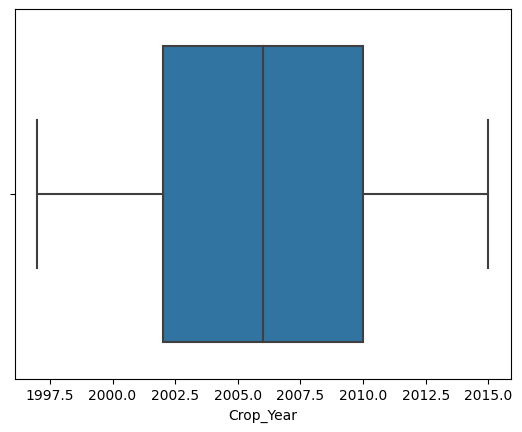

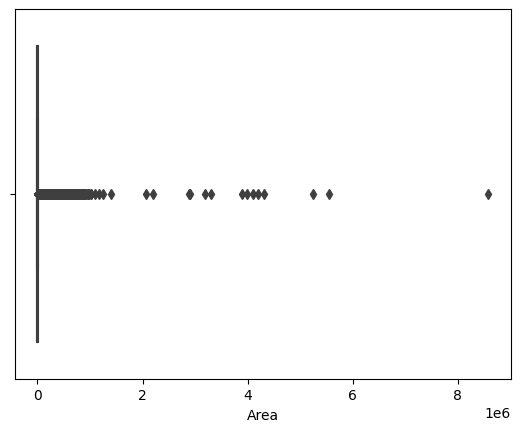

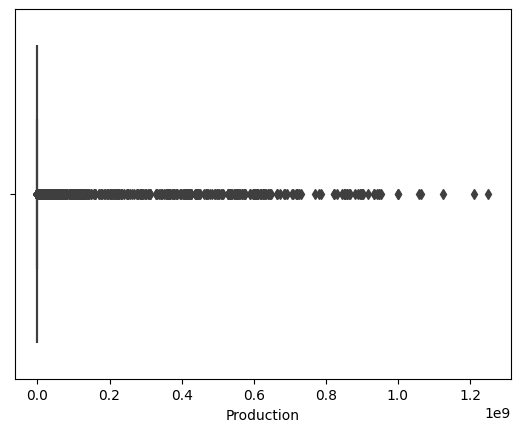

In [15]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])
    plt.show()

In [16]:
# capping
for i in df.select_dtypes(include=np.number).columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df[i]=df[i].apply(lambda x:ll if x<ll else ul if x>ul else x)

In [17]:
df.skew()

Crop_Year     0.015877
Area          1.198802
Production    1.190846
dtype: float64

In [18]:
# My target column is Attrition, so im checking the value_counts

df['Production'].value_counts()/len(df)*100

17425.5    17.490438
1.0         1.661984
0.0         1.453617
100.0       1.452791
2.0         1.222969
             ...    
11141.0     0.000413
10248.0     0.000413
14490.0     0.000413
15998.0     0.000413
17412.0     0.000413
Name: Production, Length: 19498, dtype: float64

In [19]:
df.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0


In [20]:
df.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             11750
Production       19498
dtype: int64

In [21]:
df.select_dtypes(exclude=np.number).columns

Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')

# Statistical Analysis

In [22]:
# Numerical columns significantly affecting the target
from scipy.stats import kruskal

p_val = []
for col in df.select_dtypes(include=np.number).columns:
    if col != 'Production':  # Exclude the target column itself
        print(col)
        # Assuming we want to test if numeric columns significantly differ by 'Production' value categories
        try:
            result = kruskal(df[df['Production'] <= df['Production'].median()][col],
                             df[df['Production'] > df['Production'].median()][col])
            p_value = result.pvalue
            p_val.append((col, round(p_value, 2)))
            if p_value < 0.05:
                print("Reject the null hypothesis. There is a significant difference.")
            else:
                print("Fail to reject the null hypothesis. No significant difference.")
        except ValueError as e:
            print(f"Error in column {col}: {e}")

Crop_Year
Reject the null hypothesis. There is a significant difference.
Area
Reject the null hypothesis. There is a significant difference.


In [23]:
# Categorical columns significantly affecting the target

from scipy.stats import chi2_contingency

p_val_cat = []
for col in df.select_dtypes(include=object).columns:
    if col != 'Production':  # Exclude the target column itself
        print(col)
        # Create a contingency table
        contingency_table = pd.crosstab(df[col], pd.cut(df['Production'], bins=2, labels=['Low', 'High']))
        try:
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            p_val_cat.append((col, round(p_value, 2)))
            if p_value < 0.05:
                print("Reject the null hypothesis. There is a significant difference.")
            else:
                print("Fail to reject the null hypothesis. No significant difference.")
        except ValueError as e:
            print(f"Error in column {col}: {e}")

State_Name
Reject the null hypothesis. There is a significant difference.
District_Name
Reject the null hypothesis. There is a significant difference.
Season
Reject the null hypothesis. There is a significant difference.
Crop
Reject the null hypothesis. There is a significant difference.


In [24]:
df.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0


In [25]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [26]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

# Encoding

'State_Name', 'District_Name', 'Season', 'Crop'

In [27]:
df.select_dtypes(exclude=np.number).head(2)

,State_Name,District_Name,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,Kharif,Other Kharif pulses


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
df['State_Name'] = le.fit_transform(df['State_Name'])
df['District_Name'] = le.fit_transform(df['District_Name'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

In [29]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0


# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler

for i in df.columns:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])

df_scale = pd.DataFrame(df, columns=df.columns)
df_scale.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,-1.7503,0.618251,-1.134623,-0.909387,-1.952325,-0.418302,-0.396945
1,-1.7503,0.618251,-1.134623,-0.909387,0.161627,-0.716060,-0.697377
2,-1.7503,0.618251,-1.134623,-0.909387,0.778196,-0.692278,-0.649284
3,-1.7503,0.618251,-1.134623,1.423439,-1.805523,-0.674679,-0.601191
4,-1.7503,0.618251,-1.134623,1.423439,-1.365116,-0.545301,-0.672729


In [31]:
df_scale.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [32]:
df_scale.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# Base Model Building 

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# To validate we need to split the dataset in train and test, considering only significant columns w.r.to target column

x = df_scale[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area']]
y = df_scale['Production']

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8, random_state=1)

In [36]:
# Base Model: Linear Regression

xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

# Create and fit the OLS model
model = sm.OLS(ytrain, xtrain)
results = model.fit()

# Predict on test set
y_pred = results.predict(xtest)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(ytest, y_pred))
print("R2 Score:", r2_score(ytest,y_pred))

# Optional: print the summary of the OLS regression
print(results.summary())


Mean Squared Error: 0.3073597744002062
R2 Score: 0.6916601893555274
                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 7.157e+04
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:52:28   Log-Likelihood:            -1.6198e+05
No. Observations:              193888   AIC:                         3.240e+05
Df Residuals:                  193881   BIC:                         3.240e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

# Building models using regularization techniques


In [37]:
from sklearn.linear_model import Ridge, Lasso

# Ridge regression
rd = Ridge(alpha=0.5)
rd.fit(xtrain, ytrain)
y_pred_ridge = rd.predict(xtest)
print("Ridge MSE:", mean_squared_error(ytest, y_pred_ridge))

# Lasso regression
Ls = Lasso(alpha=0.05)
Ls.fit(xtrain, ytrain)
y_pred_lasso = Ls.predict(xtest)
print("Lasso MSE:", mean_squared_error(ytest, y_pred_lasso))

Ridge MSE: 0.30735977415891796
Lasso MSE: 0.31369352985128973


### Building random forest model with all features to find out the feature importance

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, max_depth = 10)
forest.fit(xtrain,ytrain)

y_pred = results.predict(xtest)

print("Mean Squared Error:", mean_squared_error(ytest, y_pred))
print("R2 Score:", r2_score(ytest,y_pred))

Mean Squared Error: 0.3073597744002062
R2 Score: 0.6916601893555274


<Figure size 2000x1500 with 0 Axes>

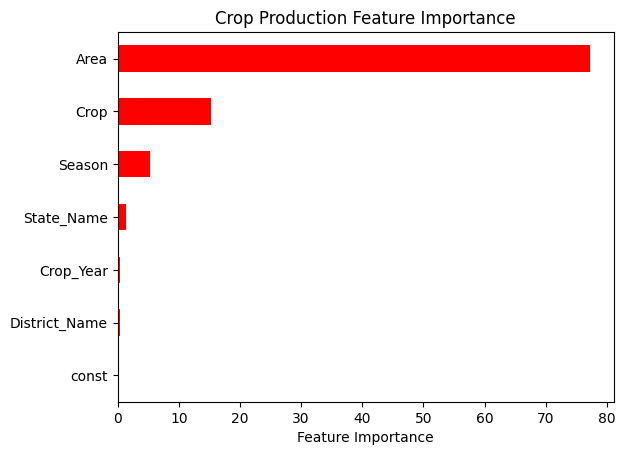

<Figure size 2000x1500 with 0 Axes>

In [39]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=xtrain.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Feature Importance')
plt.title('Crop Production Feature Importance')
plt.gca().legend_ = None
plt.figure(figsize=(20,15))

# Businees Insights

#### 1) Area: 
* The most significant factor in crop production. This suggests that the size of the land used for farming has the greatest impact on crop yields. Businesses should focus on optimizing land use to maximize production.
#### 2) Crop: 
* The type of crop grown is the second most important factor. This indicates that different crops have varying levels of productivity. Selecting the right crop for the right conditions can enhance yields.
#### 3) Season: 
* The season in which crops are grown also plays a crucial role. Understanding seasonal patterns and planting crops at the optimal time can improve production efficiency.
#### 4) State_Name and District_Name: 
* These factors highlight the importance of geographical location. Different states and districts may have varying soil quality, climate conditions, and other factors that affect crop production. Tailoring agricultural practices to specific regions can lead to better outcomes.
#### 5) Crop_Year: 
* The year of cultivation has some importance, possibly due to changes in weather patterns, technological advancements, or other temporal factors.

In [40]:
from reportlab.pdfgen import canvas

def convert_to_pdf_reportlab(input_file, output_pdf):
    pdf_canvas = canvas.Canvas(output_pdf)
    
    with open(input_file, 'r', encoding='utf-8') as python_file:
        content = python_file.read()
        # To handle the content correctly, we need to split it into lines and draw each line separately.
        lines = content.split('\n')
        y = 800
        for line in lines:
            pdf_canvas.drawString(100, y, line)
            y -= 12  # Move the cursor down for the next line (12 is an arbitrary line height)
    
    pdf_canvas.save()

# Example usage:
convert_to_pdf_reportlab('Crop_Production_Analysis.ipynb', 'Crop_Production_Analysis.pdf')
print("PDF is Saved Successfully")

PDF is Saved Successfully
